In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
ma_test_res = pd.read_pickle("ma_test_res.pkl")
all_trades = pd.read_pickle("all_trades.pkl")

In [3]:
ma_test_res.head()

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,mashort,malong
0,GBP_USD,562,175.7,0.312633,-76.2,205.6,4,8
1,GBP_USD,306,-25.4,-0.083007,-86.7,224.8,4,16
2,GBP_USD,272,87.4,0.321324,-91.5,211.6,8,16
3,GBP_USD,206,-589.3,-2.860680,-112.2,217.6,4,32
4,GBP_USD,158,-1205.1,-7.627215,-120.8,204.4,8,32


In [4]:
ma_test_res.shape

(630, 8)

In [5]:
ma_test_res['pair'].unique()

array(['GBP_USD', 'GBP_CAD', 'GBP_JPY', 'GBP_NZD', 'GBP_CHF', 'EUR_GBP',
       'EUR_USD', 'EUR_CAD', 'EUR_JPY', 'EUR_NZD', 'EUR_CHF', 'USD_CAD',
       'USD_JPY', 'USD_CHF', 'CAD_JPY', 'CAD_CHF', 'NZD_USD', 'NZD_CAD',
       'NZD_JPY', 'NZD_CHF', 'CHF_JPY'], dtype=object)

630 是指可供交易的 21 個貨幣對與 6 個慢線，7 個快線的組合數 (注意到快線週期不能大於慢線週期) (21*30=630)   
8 指的是有每個組合有 8 筆資訊 (即 ```ma_res.py``` 的 ```res_ob``` 物件)

In [6]:
ma_test_res.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'mashort', 'malong'],
      dtype='object')

In [7]:
ma_test_res = ma_test_res[ ['pair', 'num_trades', 'total_gain', 'mashort', 'malong'] ]

In [8]:
ma_test_res.head()

,pair,num_trades,total_gain,mashort,malong
0,GBP_USD,562,175.7,4,8
1,GBP_USD,306,-25.4,4,16
2,GBP_USD,272,87.4,8,16
3,GBP_USD,206,-589.3,4,32
4,GBP_USD,158,-1205.1,8,32


### 將快慢線組成統一名稱

這裡會使用 <font colo='red'> Pandas </font> 裡的 ```map()``` function，  
注意到 python 也有內建的 map 函數，  
但功能我看起來是差不多，就是將 ```map()``` 括號內參數的動作帶入

In [9]:
ma_test_res["CROSS"] = "MA_" + ma_test_res['mashort'].map(str) + "_" + ma_test_res['malong'].map(str)

In [10]:
ma_test_res.head()

,pair,num_trades,total_gain,mashort,malong,CROSS
0,GBP_USD,562,175.7,4,8,MA_4_8
1,GBP_USD,306,-25.4,4,16,MA_4_16
2,GBP_USD,272,87.4,8,16,MA_8_16
3,GBP_USD,206,-589.3,4,32,MA_4_32
4,GBP_USD,158,-1205.1,8,32,MA_8_32


In [11]:
df_all_gains = ma_test_res.groupby(by="CROSS", as_index=False).sum()

In [12]:
df_all_gains.head()

,CROSS,num_trades,total_gain,mashort,malong
0,MA_16_128,1045,-9299.8,336,2688
1,MA_16_256,686,-8430.1,336,5376
2,MA_16_32,2823,376.9,336,672
3,MA_16_64,1635,-1322.6,336,1344
4,MA_16_96,1236,-2539.2,336,2016


因為 ```groupby()``` 的概念是根據原 data frame 的某一 column 重新排列資料，  
所以預設會將你用來重排的依據 (以此例為依據 ```CROSS```)作為 row 的名稱 (如下圖)  
如果想保留原先編號 (也就是數字編號)，就要加上 ```as_index``` 參數

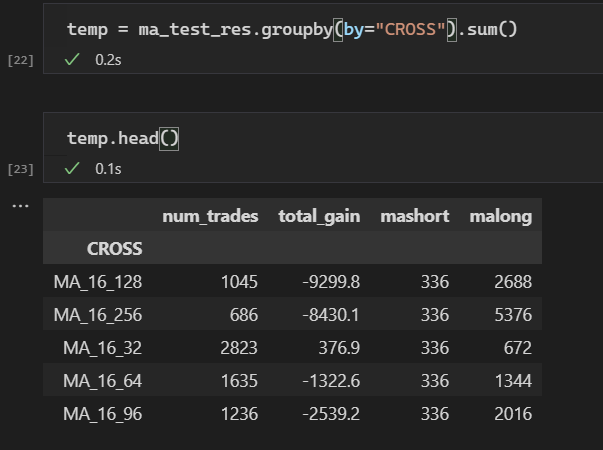

In [13]:
df_all_gains.head()

,CROSS,num_trades,total_gain,mashort,malong
0,MA_16_128,1045,-9299.8,336,2688
1,MA_16_256,686,-8430.1,336,5376
2,MA_16_32,2823,376.9,336,672
3,MA_16_64,1635,-1322.6,336,1344
4,MA_16_96,1236,-2539.2,336,2016


### 增加維度: 改為用 ```CROSS```、```mashort```、以及 ```malong``` 分類

In [14]:
df_all_gains = ma_test_res.groupby(by=['CROSS','mashort', 'malong'], as_index=False).sum()

In [15]:
df_all_gains.head(10)

,CROSS,mashort,malong,num_trades,total_gain
0,MA_16_128,16,128,1045,-9299.8
1,MA_16_256,16,256,686,-8430.1
2,MA_16_32,16,32,2823,376.9
3,MA_16_64,16,64,1635,-1322.6
4,MA_16_96,16,96,1236,-2539.2
5,MA_24_128,24,128,909,-7737.9
6,MA_24_256,24,256,576,-8951.0
7,MA_24_32,24,32,3205,-4112.6
8,MA_24_64,24,64,1421,1051.3
9,MA_24_96,24,96,1083,-3934.6


### 依照損益排序

In [16]:
df_all_gains.sort_values(by='total_gain', ascending=False, inplace=True)

In [17]:
df_all_gains.head(10) # 可以看到 30 種 MA 組合中只有 7 種組合帶來正報酬

,CROSS,mashort,malong,num_trades,total_gain
25,MA_8_16,8,16,5761,3044.3
27,MA_8_32,8,32,3156,3033.9
18,MA_4_64,4,64,2635,1992.0
8,MA_24_64,24,64,1421,1051.3
15,MA_4_16,4,16,6537,828.0
12,MA_32_64,32,64,1384,808.7
17,MA_4_32,4,32,4041,511.1
2,MA_16_32,16,32,2823,376.9
28,MA_8_64,8,64,1993,-72.7
19,MA_4_8,4,8,11775,-622.7


### 抓出表現最好的 MA 組合觀察

In [18]:
ma_8_16 = ma_test_res[ ma_test_res['CROSS'] == 'MA_8_16'].copy()

In [19]:
# 找出策略每筆交易的狀況
ma_8_16.sort_values(by='total_gain', ascending=False, inplace=True)

In [20]:
ma_8_16.head()

,pair,num_trades,total_gain,mashort,malong,CROSS
212,EUR_CAD,259,1244.9,8,16,MA_8_16
512,NZD_CAD,257,625.9,8,16,MA_8_16
422,CAD_JPY,267,573.4,8,16,MA_8_16
272,EUR_NZD,277,547.4,8,16,MA_8_16
602,CHF_JPY,279,507.6,8,16,MA_8_16


### 計算損益為正的機率

In [21]:
profit_p = ma_8_16[ ma_8_16['total_gain'] > 0]

In [22]:
pos = profit_p.shape[0]
pos
# 共有 15 組貨幣對可以帶來正報酬

15

In [23]:
all_pair_count = len(ma_8_16['pair'].unique())
all_pair_count

21

In [24]:
prob = pos / all_pair_count
prob

# 這代表在 8 MA+16 MA 的組合裡，有約 70% 的商品可以獲利

0.7142857142857143

### 延伸: 對所有 MA 組合計算勝率

In [25]:
for cross in df_all_gains['CROSS'].unique():
    # create a temporary data frame
    df_temp = ma_test_res[ ma_test_res['CROSS'] == cross]
    
    # total_p 存放該 MA 組合的交易商品總數
    total_p = df_temp.shape[0]

    # profit_p 存放該 MA 組合  正損益  的交易商品總數
    profit_p = df_temp[ df_temp['total_gain'] > 0 ].shape[0]
    
    # 印出相關資訊
    ## 大括號裡的 12 代表留 12 個字元的空間
    print(f"{cross:12} {profit_p:4} {(profit_p/total_p)*100:4.0f}%")

MA_8_16        15   71%
MA_8_32        15   71%
MA_4_64        13   62%
MA_24_64       13   62%
MA_4_16        11   52%
MA_32_64       11   52%
MA_4_32        14   67%
MA_16_32       12   57%
MA_8_64        10   48%
MA_4_8         10   48%
MA_16_64        8   38%
MA_4_96         9   43%
MA_8_96         8   38%
MA_16_96        8   38%
MA_32_96        7   33%
MA_24_96        8   38%
MA_24_32        7   33%
MA_4_128        7   33%
MA_64_128       3   14%
MA_32_128       7   33%
MA_8_128        5   24%
MA_24_128       7   33%
MA_16_256       4   19%
MA_8_256        4   19%
MA_64_96        4   19%
MA_24_256       6   29%
MA_16_128       5   24%
MA_4_256        2   10%
MA_32_256       6   29%
MA_64_256       6   29%


可以發現完整觀察不同週期交易各種貨幣對的勝率，其中我們發現:  
- 似乎選週期 4 (即四小時圖)與其他長線搭配，勝率都不錯
- 長線週期選越大，感覺勝率越低

---

## 深度分析 ```MA_8_16```, ```MA_8_32```, ```MA_4_64```

經過上一個 commit，我們取出勝率前三高的 MA 組合進行觀察:

### 首先取出三種組合的交易資料

In [26]:
crosses = ['MA_8_16', 'MA_8_32', 'MA_4_64']

In [27]:
# 從 ma_test_res (最前面定義的)分析出 三種 cross 及三種 cross 中獲利為正的貨幣對
df_good = ma_test_res[ (ma_test_res['CROSS'].isin(crosses)) & (ma_test_res['total_gain']>0) ].copy()

code 注意:  
- 在 pandas 用 "且" 時，要用 ```&``` (而非 ```and```)
- ```&``` 兩邊的條件要記得加上 括號!!!

In [28]:
df_good.head()

,pair,num_trades,total_gain,mashort,malong,CROSS
2,GBP_USD,272,87.4,8,16,MA_8_16
64,GBP_JPY,151,983.7,8,32,MA_8_32
67,GBP_JPY,102,1099.2,4,64,MA_4_64
97,GBP_NZD,127,343.6,4,64,MA_4_64
124,GBP_CHF,151,77.5,8,32,MA_8_32


### 接著找出對三種 MA 組合都有正獲利的貨幣對

In [29]:
df_good['pair'].value_counts()

CHF_JPY    3
NZD_CHF    3
NZD_JPY    3
EUR_USD    3
EUR_CAD    3
EUR_NZD    3
CAD_CHF    3
CAD_JPY    3
USD_JPY    3
USD_CHF    2
NZD_USD    2
USD_CAD    2
GBP_JPY    2
EUR_CHF    2
GBP_CHF    2
EUR_JPY    1
NZD_CAD    1
GBP_NZD    1
GBP_USD    1
Name: pair, dtype: int64

出現 3 的貨幣對共有 9 種，這代表 CHFJPY (及其他八種貨幣對)不管是套用 (8, 16)，還是 (8, 32)，還是 (4, 64)，都是正報酬

In [30]:
type(df_good['pair'].value_counts()[:9]) # value_counts() 回傳的是 series

pandas.core.series.Series

In [31]:
df_good['pair'].value_counts()[:9].index # 取出 series 物件的 index

Index(['CHF_JPY', 'NZD_CHF', 'NZD_JPY', 'EUR_USD', 'EUR_CAD', 'EUR_NZD',
       'CAD_CHF', 'CAD_JPY', 'USD_JPY'],
      dtype='object')

In [32]:
our_pairs = list(df_good['pair'].value_counts()[:9].index) # 再把 Index 物件改為 list

In [33]:
our_pairs

['CHF_JPY',
 'NZD_CHF',
 'NZD_JPY',
 'EUR_USD',
 'EUR_CAD',
 'EUR_NZD',
 'CAD_CHF',
 'CAD_JPY',
 'USD_JPY']

### 查看這九種貨幣對的詳細交易資訊

In [34]:
all_trades.head()

,time,mid_c,DIFF,DIFF_PREV,IS_TRADE,DELTA,GAIN,PAIR,MASHORT,MALONG,DURATION
18,2021-01-19 09:00:00+00:00,1.36076,-0.000011,0.000073,-1,8.9,-8.9,GBP_USD,4,8,1.0
19,2021-01-19 10:00:00+00:00,1.36165,0.000044,-0.000011,1,20.7,20.7,GBP_USD,4,8,28.0
47,2021-01-20 14:00:00+00:00,1.36372,-0.001062,0.000375,-1,18.0,-18.0,GBP_USD,4,8,7.0
54,2021-01-20 21:00:00+00:00,1.36552,0.000424,-0.000119,1,71.8,71.8,GBP_USD,4,8,17.0
71,2021-01-21 14:00:00+00:00,1.37270,-0.000293,0.000066,-1,-16.6,16.6,GBP_USD,4,8,3.0


In [35]:
# 發現少放 MA_?_?
all_trades["CROSS"] = "MA_" + all_trades['MASHORT'].map(str) + "_" + all_trades['MALONG'].map(str)

#### 先觀察單一貨幣對 (以 CHFJPY 與 (8, 16)為例)

In [36]:
trades_chf_jpy = all_trades[ (all_trades['PAIR']=='CHF_JPY') & (all_trades['CROSS']=='MA_8_16') ].copy()

In [37]:
# 計算累積損益
trades_chf_jpy['CUM_GAIN'] = trades_chf_jpy['GAIN'].cumsum()

In [46]:
trades_chf_jpy.head(5)

,time,mid_c,DIFF,DIFF_PREV,IS_TRADE,DELTA,GAIN,PAIR,MASHORT,MALONG,DURATION,CROSS,CUM_GAIN
28,2021-01-19 20:00:00+00:00,116.906,-0.018437,0.016062,-1,-8.0,8.0,CHF_JPY,8,16,10.0,MA_8_16,8.0
38,2021-01-20 06:00:00+00:00,116.826,0.000563,-0.002125,1,8.2,8.2,CHF_JPY,8,16,1.0,MA_8_16,16.2
39,2021-01-20 07:00:00+00:00,116.908,-0.006187,0.000563,-1,-45.4,45.4,CHF_JPY,8,16,20.0,MA_8_16,61.6
59,2021-01-21 03:00:00+00:00,116.454,0.014188,-0.012687,1,76.0,76.0,CHF_JPY,8,16,97.0,MA_8_16,137.6
108,2021-01-25 04:00:00+00:00,117.214,-0.003000,0.007937,-1,-1.4,1.4,CHF_JPY,8,16,1.0,MA_8_16,139.0


#### 畫出累積損益

In [43]:
# 樣式取自 plot_candle.ipynb
def plot_line(df_plot, name):
    fig = go.Figure() 


    # 主圖:
    fig.add_trace(go.Scatter(
        x=df_plot.time, 
        y=df_plot['CUM_GAIN'],
        line=dict(color="#3d825f", width=2),
        line_shape='spline', 
        name='CHF_JPY_GAIN',
        mode='lines'
        ))

    # styling
    fig.update_layout(width=1000, height=400, 
        margin=dict(l=15, r=15, b=10), # 讓線圖更明顯
        font=dict(size=10, color='#e1e1e1'), # 將 x 軸資料轉為白色
        paper_bgcolor='#1e1e1e', # 將背景改為黑色
        plot_bgcolor='#1e1e1e', 
        title=name) #### 注意這裡!!! #### 

    fig.update_xaxes( # 更新 x 軸資料
        linewidth=1,
        linecolor='#3a4a54',
        showgrid=False, 
        zeroline=False
    )

    fig.update_yaxes( # 更新 y 軸資料
        linewidth=1,
        linecolor='#3a4a54', 
        showgrid=False,
        zeroline=False
    )


    fig.show() # 中間空白處是例假日

In [48]:
plot_line(trades_chf_jpy, 'CHF JPY Cum gain')

In [47]:
trades_chf_jpy.tail(5)['CUM_GAIN']
# 確定圖沒有畫錯 :)

3933    530.5
3948    524.8
3951    519.2
3965    511.1
3985    507.6
Name: CUM_GAIN, dtype: float64

#### 畫出九種貨幣對損益圖

In [49]:
c = 'MA_8_16' # 目前只討論這個 MA 組合

for p in our_pairs:
    temp_df = all_trades[ (all_trades['PAIR']==p) & (all_trades['CROSS']==c) ].copy()
    temp_df['CUM_GAIN'] = temp_df['GAIN'].cumsum()
    plot_line(temp_df, p + '_' + c)


### 畫出所有貨幣對所有 MA 組合的總損益 (也就是每個貨幣對都交易)

下方 code 要注意的地方是:  
```temp_df = temp_df.groupby(by='time', as_index=False).sum()``` 的作用是將同樣的時間給 "加起來"，  
因為我們是 "同時" 交易很多貨幣對，所以有可能發生在同一時間有多個貨幣對達成出場條件 (或進場條件)，  
那同樣的時間相加，時間本身不會變，  
但我們達到將不同貨幣對 ```GAIN``` 相加的目的


也可以從下面 print 出來的資訊觀察，  
注意到第一個 data frame 中 ```IS_TRADE``` 出現 ```-3```!!  
這代表在那個時點 (```2021.01.19 11:00 UTC``` 有 ```3``` 個貨幣對出場)

In [56]:
for c in crosses:
    temp_df = all_trades[ (all_trades['CROSS'] == c) ].copy()
    temp_df = temp_df.groupby(by='time', as_index=False).sum() 
    print(temp_df.head())
    temp_df['CUM_GAIN'] = temp_df['GAIN'].cumsum()

    plot_line(temp_df, c)

                       time     mid_c      DIFF     DIFF_PREV  IS_TRADE  \
0 2021-01-19 09:00:00+00:00   1.54326  0.000288 -6.250000e-07         1   
1 2021-01-19 10:00:00+00:00   3.43670  0.000623 -3.512500e-04         2   
2 2021-01-19 11:00:00+00:00   5.35702 -0.000349  1.262500e-04        -3   
3 2021-01-19 13:00:00+00:00   1.78970 -0.000146  1.931250e-04        -2   
4 2021-01-19 14:00:00+00:00  75.17958 -0.020751  2.913187e-02         0   

   DELTA  GAIN  MASHORT  MALONG  DURATION  
0   11.2  11.2        8      16      14.0  
1    5.2   5.2       16      32      37.0  
2   64.5  12.7       40      80      65.0  
3    2.3  -2.3       16      32      17.0  
4  -14.7 -31.7       16      32      21.0  


                       time      mid_c      DIFF  DIFF_PREV  IS_TRADE  DELTA  \
0 2021-01-20 01:00:00+00:00  103.81000 -0.003531   0.008531        -1  -30.0   
1 2021-01-20 02:00:00+00:00    0.88948 -0.000013   0.000024        -1  -33.2   
2 2021-01-20 03:00:00+00:00    0.71294  0.000113  -0.000020         1   55.0   
3 2021-01-20 06:00:00+00:00    0.69949  0.000014  -0.000153         1   26.9   
4 2021-01-20 07:00:00+00:00  116.90800 -0.005094   0.021219        -1  -12.8   

   GAIN  MASHORT  MALONG  DURATION  
0  30.0        8      32      42.0  
1  33.2        8      32      45.0  
2  55.0        8      32      51.0  
3  26.9        8      32      33.0  
4  12.8        8      32      30.0  


                       time      mid_c      DIFF  DIFF_PREV  IS_TRADE  DELTA  \
0 2021-01-21 10:00:00+00:00    2.81033  0.000021  -0.000600         0  -31.1   
1 2021-01-21 13:00:00+00:00    1.72984 -0.000656   0.000005        -1   34.5   
2 2021-01-21 14:00:00+00:00  116.93000  0.050391  -0.047891         1  -15.2   
3 2021-01-21 15:00:00+00:00  125.84300  0.033984  -0.022562         1    3.2   
4 2021-01-21 17:00:00+00:00    1.73329  0.000620  -0.000220         1  198.8   

    GAIN  MASHORT  MALONG  DURATION  
0  -29.9        8     128      31.0  
1  -34.5        4      64       4.0  
2  -15.2        4      64      97.0  
3    3.2        4      64      96.0  
4  198.8        4      64     190.0  
